### Exercise Sheet 5

In [71]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.mixture import GaussianMixture
from scipy.stats import norm, multivariate_normal


**Exercise 1 - k-means clustering**

**1. Use the K-means algorithm and Euclidean distance to cluster the 10 data points
into K = 3 clusters. The coordinates of the data points are given in Table 1. Use
the data points a4, a5, and a8 as initialization and perform 2 iteration steps. You
can do the cluster assignment also visually without computing the exact
distances. (2 point)**

**Initialization**
- k=3 
- cluster centers = a4(4,8), a5(3,1), a8(6,4)


**Iteration 1**
 1. Assign each data point to a cluster based on the Euclidean distance of the point from the cluster center

In [3]:
k = 3
datapoints = np.array([(2,1), (5,7), (3,2), (4,8), (3,1), (7,4), (4,6), (6,4), (3,7), (6,3)])
cluster_centers = np.array([(4,8), (3,1), (6,4)])

print( 'Cluster', 'Coordinates' )
for i in range(len(cluster_centers)):
    print(f'{i} \t   {cluster_centers[i][:]}')

Cluster Coordinates
0 	   [4 8]
1 	   [3 1]
2 	   [6 4]


In [4]:
# Calculating Euclidean distance
def get_euclidean_distance_from_center(datapoints, cluster_centers):
    '''
    This method prints the Euclidean Distance of each data point from
    each of the cluster center in cluster_centers array
    
    Parameters:
    datapoints(numpy array): Array of data points
    cluster_centers(numpy array): Array of cluster centers
    
    Return:
    assigned_cluster: Array containing Cluster index of the assigned cluster for each data point
    '''
    
    assigned_cluster = np.arange(len(datapoints))
    cluster_distance = np.arange(len(cluster_centers))
    
    for j in np.arange(len(datapoints)):
        print( f'Datapoint a{j+1} ({datapoints[j][0]}, {datapoints[j][1]})')
        
        for i in np.arange(len(cluster_centers)):
            distance = np.power((np.square(datapoints[j][0] - cluster_centers[i][0]) + np.square(datapoints[j][1] - cluster_centers[i][1]) ), 0.5)
            cluster_distance[i] = distance
            print( f'Distance from Cluster Center ({cluster_centers[i][0]}, {cluster_centers[i][1]})  is {distance}')
            
        assigned_cluster[j] = np.argmin(cluster_distance)
        print(f'Assigned to Cluster {assigned_cluster[j]}, {cluster_centers[assigned_cluster[j]][:]}')
    return assigned_cluster

assigned_cluster_result = get_euclidean_distance_from_center(datapoints, cluster_centers)
assigned_cluster_result

Datapoint a1 (2, 1)
Distance from Cluster Center (4, 8)  is 7.280109889280518
Distance from Cluster Center (3, 1)  is 1.0
Distance from Cluster Center (6, 4)  is 5.0
Assigned to Cluster 1, [3 1]
Datapoint a2 (5, 7)
Distance from Cluster Center (4, 8)  is 1.4142135623730951
Distance from Cluster Center (3, 1)  is 6.324555320336759
Distance from Cluster Center (6, 4)  is 3.1622776601683795
Assigned to Cluster 0, [4 8]
Datapoint a3 (3, 2)
Distance from Cluster Center (4, 8)  is 6.082762530298219
Distance from Cluster Center (3, 1)  is 1.0
Distance from Cluster Center (6, 4)  is 3.605551275463989
Assigned to Cluster 1, [3 1]
Datapoint a4 (4, 8)
Distance from Cluster Center (4, 8)  is 0.0
Distance from Cluster Center (3, 1)  is 7.0710678118654755
Distance from Cluster Center (6, 4)  is 4.47213595499958
Assigned to Cluster 0, [4 8]
Datapoint a5 (3, 1)
Distance from Cluster Center (4, 8)  is 7.0710678118654755
Distance from Cluster Center (3, 1)  is 0.0
Distance from Cluster Center (6, 4)  is

array([1, 0, 1, 0, 1, 2, 0, 2, 0, 2])

2. Compute Cluster Center for each cluster

In [5]:
assigned_cluster_result

array([1, 0, 1, 0, 1, 2, 0, 2, 0, 2])

In [6]:
def get_cluster_centers(datapoint_cluster_assignment, datapoints):
    '''
    This method returns the computed cluster centers for each cluster
    
    Parameters:
    datapoint_cluster_assignment: array contining the cluster assignment for each data point
    datapoints: array of datapoints
    '''
    cluster_centers = np.zeros((3,2))
    for cluster in  range(cluster_centers.shape[0]):
        
        # filter indices of data points which belong to the cluster
        cluster_datapoint_indices = np.where(assigned_cluster_result == cluster)[0]
        
        x_index_mean = 0
        y_index_mean = 0
        cluster_size = len(cluster_datapoint_indices)
        
        for index in cluster_datapoint_indices:
            x_index_mean = x_index_mean + datapoints[index][0]
            y_index_mean = y_index_mean + datapoints[index][1]
            
        cluster_centers[cluster][0] = x_index_mean/cluster_size
        cluster_centers[cluster][1] = y_index_mean/cluster_size
        
        print(f'Cluster Center for Cluster {cluster} is {cluster_centers[cluster][:]}')
    return cluster_centers

iteration_1_cluster_centers = get_cluster_centers(assigned_cluster_result, datapoints)

Cluster Center for Cluster 0 is [4. 7.]
Cluster Center for Cluster 1 is [2.66666667 1.33333333]
Cluster Center for Cluster 2 is [6.33333333 3.66666667]


In [7]:
print( 'Cluster', 'Coordinates' )
for i in range(len(iteration_1_cluster_centers)):
    print(f'{i} \t   {iteration_1_cluster_centers[i][:]}')

Cluster Coordinates
0 	   [4. 7.]
1 	   [2.66666667 1.33333333]
2 	   [6.33333333 3.66666667]


**Iteration 2**

In [8]:
iteration_2_cluster_result = get_euclidean_distance_from_center(datapoints, iteration_1_cluster_centers)

Datapoint a1 (2, 1)
Distance from Cluster Center (4.0, 7.0)  is 6.324555320336759
Distance from Cluster Center (2.6666666666666665, 1.3333333333333333)  is 0.7453559924999298
Distance from Cluster Center (6.333333333333333, 3.6666666666666665)  is 5.088112507491249
Assigned to Cluster 1, [2.66666667 1.33333333]
Datapoint a2 (5, 7)
Distance from Cluster Center (4.0, 7.0)  is 1.0
Distance from Cluster Center (2.6666666666666665, 1.3333333333333333)  is 6.128258770283412
Distance from Cluster Center (6.333333333333333, 3.6666666666666665)  is 3.5901098714230026
Assigned to Cluster 0, [4. 7.]
Datapoint a3 (3, 2)
Distance from Cluster Center (4.0, 7.0)  is 5.0990195135927845
Distance from Cluster Center (2.6666666666666665, 1.3333333333333333)  is 0.74535599249993
Distance from Cluster Center (6.333333333333333, 3.6666666666666665)  is 3.726779962499649
Assigned to Cluster 1, [2.66666667 1.33333333]
Datapoint a4 (4, 8)
Distance from Cluster Center (4.0, 7.0)  is 1.0
Distance from Cluster Ce

In [9]:
iteration_2_cluster_centers = get_cluster_centers(iteration_2_cluster_result, datapoints)

Cluster Center for Cluster 0 is [4. 7.]
Cluster Center for Cluster 1 is [2.66666667 1.33333333]
Cluster Center for Cluster 2 is [6.33333333 3.66666667]


We end k-means clustering iterations here as the cluster centers have converged, the cluster assignment of data points has converged and we have reached the max no. of iterations specified in the question

**2. Shown are the results of a k-means clustering with three different initializations:**


**I. How does the choice of the initial starting points affect the clustering?**

- The result of the k-means algorithm is impacted by the initial starting points.
- The algorithm tries to minimize the distortion or inner cluster variance i.e sum of squared error for the clustering and may get stuck with a locally optimum solution without reaching the globally optimum solution depending on the starting points.
- Minimizing the distortion requires optimizing cluster centers and cluster assignments, which is an NP Hard problem, hence different heuristics are used. The k-means algorithm alternates between cluster center optimization and cluster assignment.

**II. How can you avoid getting a clustering result that is dependent on the
initialization?**

- For a lower value of k, we can repeat the algorithm multiple times with different initializations
- For higher values of k, we can use advanced version of k-means to pick better 
- Initialization using furtherest point heuristic can improve the result of k-means algorithm
- Using different initialization strategies such as Forgy initialization, Random Partition initialization, k-means++ initialization
- Cluster using mini batches instead of full dataset

**III. What are the pros and cons of the k-means clustering?**

Pros of k-means clustering:
- Algorithm usually converges very fast
- Simple implementation
- It scales to large datasets
- Convergence is guarenteed in this algorithm
- User can decide the position of initial centroids
- Generalises to clusters of different shapes and sizes


Cons of k-means clustering:
- The number of clusters(k) must be detected manually
- The clustering result is impacted by initialization of starting points
- It has difficulty in clustering data of varying size and density
- It is impacted by outliers. Outliers will impact the calculation of cluster centers or centroid may be classified as a spearate cluster by the algorithm
- It does not perform well for high dimensional data. As the number of dimensions increases the distance based similarity measure converges to a constant value
- It can only detect spherical clusters or linearly separable clusters
- It performs a hard assignment to clusters rather than providing a probabilisic assignment of cluster membership. Hence small shifts can cause data points to flip cluster membership


**3. Use the provided breast cancer data (cancer.csv) to perform a k-means
clustering. Perform the clustering for a range of clusters between 2 and 10. Set
the random_state to 20 to keep reproducibility**

In [10]:
# read dataset
cancer_dataset = pd.read_csv('cancer.csv', index_col = 'Unnamed: 0')
cancer_dataset.columns[1]

'mean concavity'

In [11]:
# performing k-means clustering for k=2...10, random_state=20

kmeans_results = []
for k in range(2, 11, 1):
    kmeans = KMeans(n_clusters = k, random_state = 20).fit(cancer_dataset)
    kmeans_results.append(kmeans.labels_)

**a. For each clustering plot the cluster assignment within a scatter plot for the
features “mean radius” and “mean concavity”.**

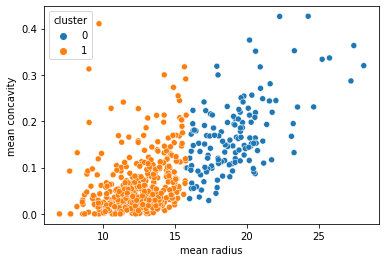

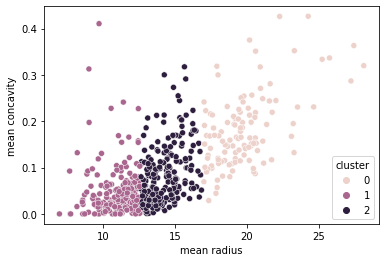

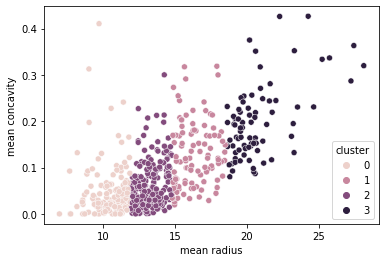

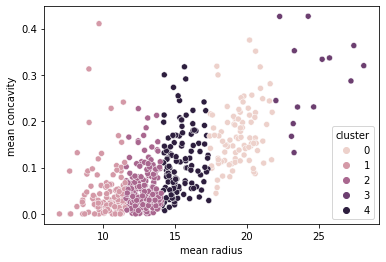

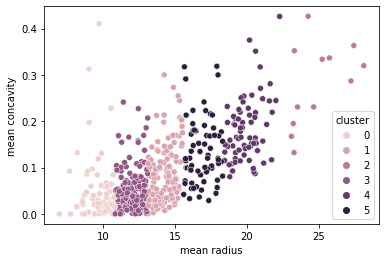

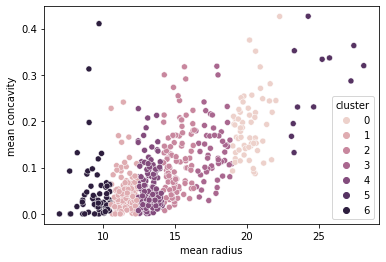

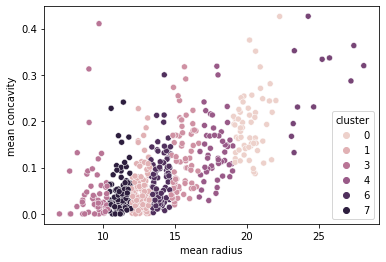

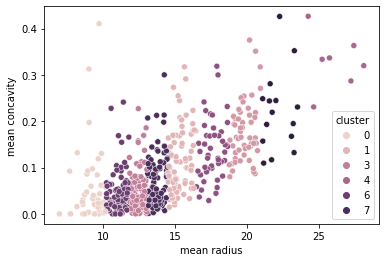

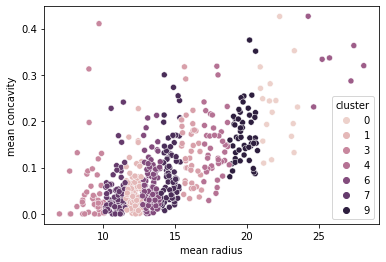

In [12]:
# iterate over clustering results
for i in range(len(kmeans_results)):
    
    # plot scatter plot of clustering
    cancer_dataset['cluster'] = kmeans_results[i]
    sn.scatterplot(data=cancer_dataset, x = 'mean radius', y = 'mean concavity', hue = 'cluster')
    plt.show()

**b. For each clustering create silhouette plots and print out the score.**

Silhouette score of Clusering with k=2 is 0.4632443490942077


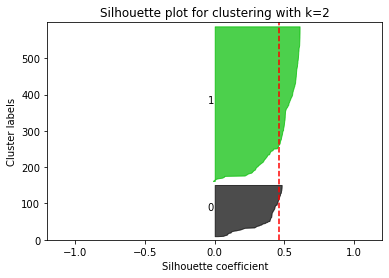

Silhouette score of Clusering with k=3 is 0.3563894609015006


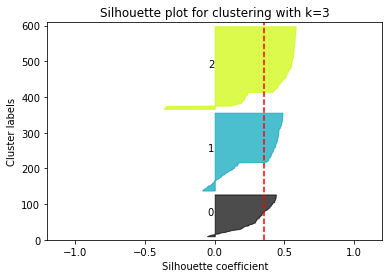

Silhouette score of Clusering with k=4 is 0.2700633814780179


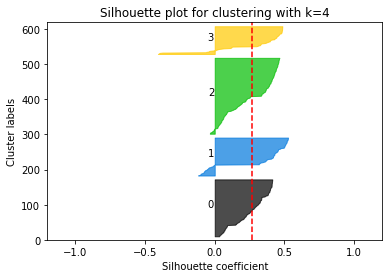

Silhouette score of Clusering with k=5 is 0.3179506752344544


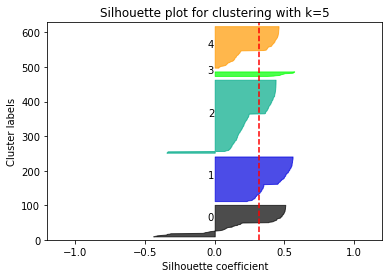

Silhouette score of Clusering with k=6 is 0.3583679643511928


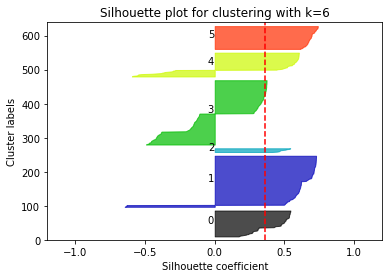

Silhouette score of Clusering with k=7 is 0.3089605543618563


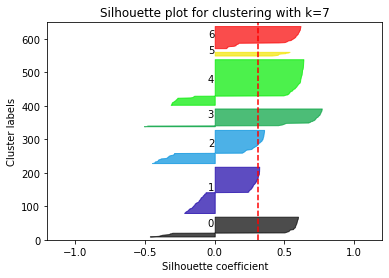

Silhouette score of Clusering with k=8 is 0.21943693763809197


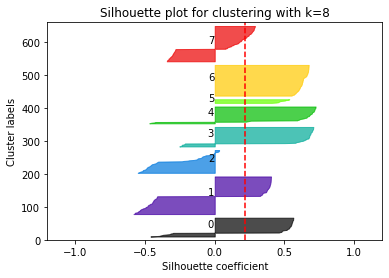

Silhouette score of Clusering with k=9 is 0.34249016964723467


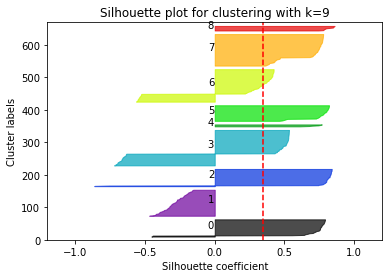

Silhouette score of Clusering with k=10 is 0.8215953615993703


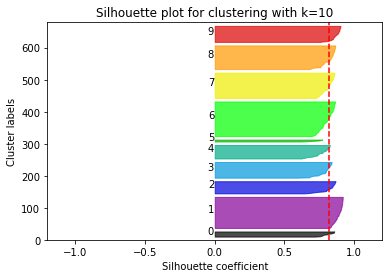

In [13]:
cancer_dataset.drop(columns = ['cluster'])

# iterate over clustering results
for i in range(len(kmeans_results)):
    
    # store clustering result in y
    y = kmeans_results[i]
    
    # plot silhouette plots of clustering
    
    plt.xlim([-1.2, 1.2])
    plt.ylim([0, cancer_dataset.shape[0] + (i+3) * 10])

    # compute average silhouette scores
    cluster_silhouette_score = silhouette_score(cancer_dataset, y)
    print(f'Silhouette score of Clusering with k={i+2} is {cluster_silhouette_score}')
    
    # compute silhouette score for each sample in clustering
    sample_silhouette_coefficient = silhouette_samples(cancer_dataset, y)
    
    y_lower = 10
    
    # iterating of each cluster of the clustering
    for current_cluster in range(i+2):
        
        # extract silhouette values of current cluster and sort them
        silhouette_value_of_current_cluster = sample_silhouette_coefficient[y == current_cluster]
        silhouette_value_of_current_cluster.sort()
        
        # calculate the value of y_upper
        size_of_current_cluster = len(silhouette_value_of_current_cluster)
        y_upper = y_lower + size_of_current_cluster
        
        # create plot
        color = cm.nipy_spectral(float(current_cluster) / (i+2))
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, silhouette_value_of_current_cluster, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_of_current_cluster, str(current_cluster))
        
        # update y_lower for next plot
        y_lower = y_upper + 10
        
    # plot line showing average silhouette coefficient for clustering
    plt.axvline(x = cluster_silhouette_score, color = 'red', linestyle='--')
    
    plt.title(f'Silhouette plot for clustering with k={i+2}')
    plt.xlabel(f'Silhouette coefficient')
    plt.ylabel(f'Cluster labels')
    plt.show()

**c. Which is the best choice for the number of clusters? Why?**

k=10 is the best choice for no. of clusters.

Observing the Silhouette plots, we see that there are clusters with below average silhouette scores for all k values except k=10. The clustering performed by taking k=10 has the highest silhouette coefficient of 0.8 indicating that it is denser and well separated as compared to other clustering. Most of  cluster silhouettes of k=10 clustering are of equal thickness while the cluster silhouettes of other k values have greater fluctuations in thickness of silhouettes.

**4. Explain the difference between k-means and k-medoids.**

- Both k-means and k-mediods are partitioning algorithms as they divide the dataset into partitions rather than following a hierarchial approach.
- k-medoids always choses datapoints as the cluster center.
- The k-means algorithm minimises the total squared error.The k-mediods algorithm minimises sum of dissimilarities between the points labelled to be in the cluster and the point designated as the center of the cluster
- k-mediods is more robust to outliers and noise as compared to k-means as it minimises the sum of pairwise dissimilarities instead of sum of squared Euclidean distances

**Exercise - 2 Gaussian mixture models**

**1. Explain the EM-Algorithm in your own words, without using any formula.**

- The Maximum Likelihood Estimation Algorithm assumes that the dataset is complete and does not contain any unobserved variables, hence the algorithm cannot be used on data with unobserved variables.
- The Expectation Maximation Algorithm is an approach for performing maximum likelihood estimation in the presence of unobserved(latent) variables.
- The EM Algorithm involves two modes :
    - Estimation Step (E- Step): Estimate the missing variables in the dataset
    - Maximization Step (M-Step): Optimize the parameters of the model to best explain the data

**2. The complexity of the Gaussian mixture model can be controlled by restricting
how the covariance matrices are allowed to vary. Assume your data has three
features and you want to cluster it into 2 clusters.**

**a. How many parameters (depending on the number of clusters) need to be
estimated in the most general model (no restrictions on the covariances)?**

**Doubtful solution**
Let $D = 3$ be the dimensions of the gaussians, $k=2$ be the no. of gaussian mixtures or clusters.

The no. of parameters to be estimated are $3*3*2+3*2+2= 26$ parameters


In the most general GMM with no restriction on co-variances, the no. of parameters which need to be estimated by the model are, $$(D*D*k)+(D*k)+k$$
Here $D*D*k$ term is due to k covariance matrices of size $D*D$, the term $D*k$ is  due to $k$ mean vectors of length $D$ and the last term $k$ is due to weight vector of length $k$.

**b. Assuming that there is no correlation between the variables for each Gaussian, how many parameters does this model need to estimate?**

**Doubtful solution**

Since there is no correlation hence the non-diagonal elements of the covariance matrix will be zero.
The no. of parameters to be estimated are $D*k+D*k+k = 6+6+2 = 14$ parameters

**c. Assuming that there is neither correlation nor does the variation for each
feature change. How many parameters does the model have to estimate
now?**

**Doubtful solution**

Since there is no correlation hence the non-diagonal elements of the covariance matrix will be zero.
Also, the diagonal elements of the covariance matrix will also be constant as the variation between the feature does not change.
The no. of parameters to be estimated are $k+k+k = 2+2+2 = 6$ parameters

**3. Cluster the breast cancer dataset (on the entire dataset: cancer_all.csv) with the
help of a Gaussian mixture model. Perform the clustering for a range of clusters
between 2 and 10 and for all possible assumptions for the covariance matrices.
Plot the BIC of each clustering.**

In [17]:
# read dataset
cancer_all_dataset = pd.read_csv('cancer_all.csv', index_col = 'Unnamed: 0' )
cancer_all_dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


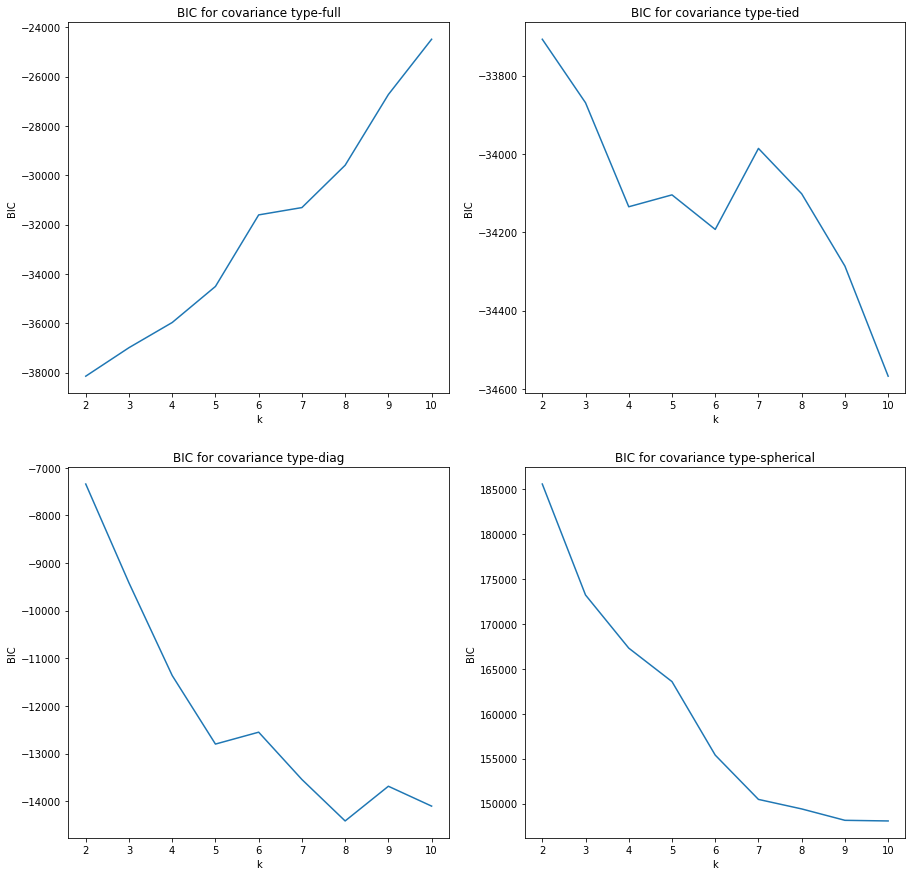

In [37]:
bic_results_full = []
bic_results_tied = []
bic_results_diag = []
bic_results_spherical = []

for k in range(2, 11, 1):
    # create models for each covariance type
    gmm_model_full = GaussianMixture(n_components = k).fit(cancer_all_dataset)  
    gmm_model_tied = GaussianMixture(n_components = k, covariance_type = 'tied').fit(cancer_all_dataset)
    gmm_model_diag = GaussianMixture(n_components = k, covariance_type = 'diag').fit(cancer_all_dataset)
    gmm_model_spherical = GaussianMixture(n_components = k, covariance_type = 'spherical').fit(cancer_all_dataset)
    
    # bic score for each model
    bic_results_full.append(gmm_model_full.bic(cancer_all_dataset))
    bic_results_tied.append(gmm_model_tied.bic(cancer_all_dataset))
    bic_results_diag.append(gmm_model_diag.bic(cancer_all_dataset))
    bic_results_spherical.append(gmm_model_spherical.bic(cancer_all_dataset))

fig, axs = plt.subplots(2,2, figsize=(15,15))
axs[0, 0].plot(range(2, 11, 1), bic_results_full)
axs[0, 0].set_title('BIC for covariance type-full')
axs[0, 0].set_xlabel('k')
axs[0, 0].set_ylabel('BIC')


axs[0, 1].plot(range(2, 11, 1), bic_results_tied)
axs[0, 1].set_title('BIC for covariance type-tied')
axs[0, 1].set_xlabel('k')
axs[0, 1].set_ylabel('BIC')


axs[1, 0].plot(range(2, 11, 1), bic_results_diag)
axs[1, 0].set_title('BIC for covariance type-diag')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('BIC')


axs[1, 1].plot(range(2, 11, 1), bic_results_spherical)
axs[1, 1].set_title('BIC for covariance type-spherical')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('BIC')
plt.show()

**a. Which is the best choice for the clustering? Why?**

The best choice for clustering is k=2 with covariance_type='full' because it achieves the lowest Bayesian Information Criterion(BIC) score. BIC balances fit to data and model complexity.

**b. Plot the data (features “mean radius” and “mean compactness”), the
cluster assignment and ellipses (to show the Gaussian component) for
your selected model.**

In [68]:
# fit and predict for selected model
selected_gmm_model = GaussianMixture(n_components = 2)
selected_gmm_model.fit(cancer_all_dataset)
plot_contours(cancer_all_dataset, selected_gmm_model.means_, selected_gmm_model.covariances_, 'Initial clusters')

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 432x288 with 0 Axes>

In [67]:
######### Utility methods for scatterplot with cluster ellipses #########
def plot_contours(data, means, covs, title):
    """visualize the gaussian components over the data"""
    plt.figure()
    plt.plot(data[:, 0], data[:, 1], 'ko')

    delta = 0.025
    k = means.shape[0]
    x = np.arange(-2.0, 7.0, delta)
    y = np.arange(-2.0, 7.0, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
        plt.contour(x_grid, y_grid, z_grid, colors = col[i])

    plt.title(title)
    plt.tight_layout()
#########################################################################

**4. How does the k-means model differ from the GMM model? Which model would
you prefer for the given data and why?**

- k-means is a non-probabilistic clustering algorithm. It provides hard assignment to each class.
- It tries to minimize the inertia i.e sum of squared error for the clustering and may get stuck with a locally optimum solution.
- The GMM algorithm performs probabilistic cluster assignments.It describes each cluster using multivariate Gaussian distribution.
- k-means cannot detect ellipsoidal clusters of different sizes while GMMs can.
- k-means converges quickly and has a simple implementation.

**Decide on preferred model??**

**5. Generate the K-Means model for the entire dataset and visualise both K-Mean
and GMM models using PCA**

In [69]:
# @TODO
kmeans = KMeans(n_clusters = 2).fit(cancer_all_dataset)
kmeans_results.append(kmeans.labels_)

**6. What are the advantages of GMMs over k-means?**

- GMMs have soft boundaries because they perform probabilistic cluster assignments, while k-means have hard boundaries as they directly assign the point to a single cluster.GMMs represent the membership of each point in a cluster probabilistically.
- GMMs can detect ellipsoidal clusters of different sizes
- They are model based hence the same model can be used to assign additional datapoints to clusters in the future.
- The BIC heuristic can be used to select the number of clusters for GMMs.

**Exercise 3 - Consensus clustering**

**1. Perform (k-means) consensus clustering of samples for the given gene
expression data allData.csv. Take minimum clusters as 2, maximum clusters as
6, resampling proportion as 80% and number of iterations as 10. Find the
following:**

In [74]:
all_genes_dataset = pd.read_csv('allData.csv', index_col = 'Unnamed: 0')
all_genes_dataset

,36638_at,39318_at,38514_at,266_s_at,38585_at,41266_at,36108_at,39389_at,31525_s_at,32612_at,...,37655_at,1440_s_at,32260_at,40070_at,1056_s_at,39200_s_at,36105_at,32578_at,39383_at,33718_at
01005,0.583368,0.535258,0.642984,0.891901,0.269871,0.605566,0.069070,0.938101,0.314737,0.590410,...,0.884590,0.399443,0.379796,0.272379,0.216088,0.355740,0.167203,0.438651,0.395720,0.273593
01010,0.505321,0.704177,0.913612,0.657634,0.402911,0.429698,0.803187,0.360471,0.718665,0.773198,...,0.086277,0.432789,0.431440,0.461242,0.443493,0.291054,0.102883,0.584035,0.589994,0.401375
03002,0.375805,0.073716,0.707562,0.847162,0.792428,0.819212,0.644334,0.735292,0.828776,0.821131,...,0.750758,0.305592,0.444996,0.293573,0.318939,0.259713,0.271869,0.556874,0.931118,0.301529
04006,1.000000,0.226960,0.119596,0.394317,0.115411,0.050117,0.440698,0.649291,0.498758,0.692290,...,0.090901,0.365967,0.170796,0.565408,0.456499,0.407845,0.100038,0.670769,0.541601,0.659517
04007,0.890125,0.631314,0.518785,0.880312,1.000000,0.858408,0.638519,0.933899,0.963169,0.818224,...,0.340640,0.285412,0.561193,0.470224,0.468927,0.243284,0.467118,0.571348,0.425701,0.196066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56007,0.072759,0.068235,0.473041,0.239455,0.223252,0.280791,0.082024,0.133053,0.768916,0.158638,...,0.371955,0.343000,0.415382,0.351072,0.351224,0.513185,0.136617,0.558943,0.225453,0.291071
64005,0.053972,0.086147,0.000065,0.136057,0.488365,0.470852,0.053909,0.116930,0.861130,0.136765,...,0.359889,0.557229,0.388962,0.375595,0.298626,0.584230,0.079315,0.353649,0.185538,0.461440
65003,0.136163,0.082575,0.456977,0.120866,0.216307,0.239017,0.069328,0.164105,0.565675,0.102278,...,0.720453,0.632587,0.652855,0.336831,0.153023,0.757112,0.179819,0.494060,0.277194,0.224542
83001,0.022913,0.026321,0.774337,0.135344,0.379465,0.544207,0.049219,0.015351,0.724584,0.139954,...,0.768953,0.357137,0.396453,0.674790,0.207006,0.287185,0.063400,0.327525,0.157277,0.337916
